Задача 1.
Предположим, мы хотим найти вероятность того, что на игральной кости при броске выпадет значение больше 4.

In [1]:
1/6 + 1/6

0.3333333333333333

Задача 2. Написать функцию для вычисления факториала и рассчитать число сочетаний из 6 по 2.

In [2]:
def fact(x):
    if x == 0:
        return 1
    return x * fact(x-1)

In [3]:
fact(4)

24

Общая формула, которая позволяет найти число сочетаний из n объектов по k имеет вид:

$C^k_n= \frac{n!}{(n−k)!⋅k!}$


In [4]:
#рассчитать число сочетаний из 6 по 2
fact(6)/(fact(6-4)*fact(4))

15.0

Задача 3. Из 30 стрелков 12 попадает в цель с вероятностью 0,6, 8 стрелков — с вероятностью 0,5, а 10 — с вероятностью 0,7. Наудачу выбранный стрелок произвёл выстрел, поразив цель.
К какой из групп, вероятнее всего, принадлежал этот стрелок?

Так как событие - попадание стрелка в мишень уже произошло, будем использовать формулу Байеса:

$$P(B\:|\:A) = \frac{P(B) \cdot P(A\:|\:B)}{P(A)}$$

In [5]:
#общая вероятность, что хоть один из стрелков попадет в мишень
P_A = 12/30 * 0.6 + 8/30 * 0.5 + 10/30 * 0.7
P_A

0.6066666666666666

In [6]:
#вероятность, что стреляла первая группа, где 12 стрелков
P_B1_A = (12/30 * 0.6) / P_A
P_B1_A

0.39560439560439564

In [7]:
#вероятность, что стреляла вторая группа, где 8 стрелков
P_B2_A = (8/30 * 0.5) / P_A
P_B2_A

0.2197802197802198

In [8]:
#вероятность, что стреляла третья группа, где 10 стрелков
P_B3_A = (10/30 * 0.7) / P_A
P_B3_A

0.38461538461538464

In [9]:
P_B1_A + P_B2_A + P_B3_A

1.0

In [17]:
#Наибольшая вероятность, что стрелял стрелок из первой группы. 
(P_B1_A > P_B2_A) and (P_B1_A > P_B3_A)

True

Задача 4. Сгенерировать выборку реализаций случайной величины (кроме распределения Коши).
Любимое распределение можно выбрать на этом [сайте](https://docs.scipy.org/doc/scipy/reference/stats.html).
Проверить ЦПТ для различных n.

In [39]:
#from scipy.stats import expon
import warnings
warnings.filterwarnings('ignore')

In [62]:
#возьмем alpha
import seaborn as sns
from scipy.stats import alpha

In [41]:
a = 3.57
mean, var, skew, kurt = alpha.stats(a, moments='mvsk')

In [61]:
r = np.linspace(alpha.ppf(0.01, a),
                alpha.ppf(0.99, a), 1000)

<AxesSubplot:ylabel='Density'>

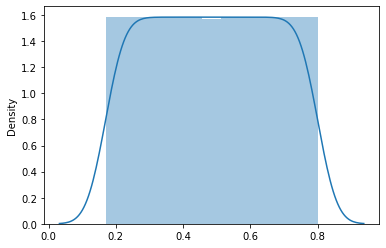

In [63]:
sns.distplot(r)

In [64]:
from scipy import stats

In [65]:
import numpy as np

In [67]:
a1=[]
for _ in range(10):
    a1.append(alpha.rvs(a, size=100).mean())

<AxesSubplot:ylabel='Density'>

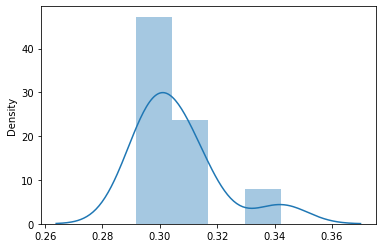

In [68]:
sns.distplot(a1)

In [71]:
stats.anderson(a1)

AndersonResult(statistic=0.7109537684872169, critical_values=array([0.501, 0.57 , 0.684, 0.798, 0.95 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Задача 5. Попробовать применить ЦПТ к распределению Коши.

In [72]:
from scipy.stats import cauchy

In [73]:
a6=[]
for _ in range(100000):
    a6.append(cauchy.rvs(size=1000).mean())

<AxesSubplot:ylabel='Density'>

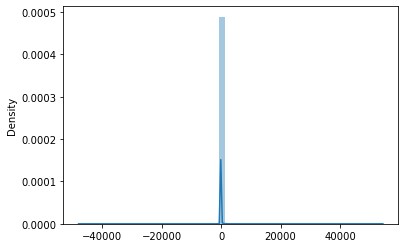

In [74]:
sns.distplot(np.array(a6))

In [75]:
stats.anderson(np.array(a6))

AndersonResult(statistic=37008.111006916355, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [76]:
a5=[]
for _ in range(100000):
    a5.append(alpha.rvs(a, size=1000).mean())

Задача 6. Посчитать основные характеристики выборки.

In [77]:
a5rr=np.array(a5)

In [78]:
np.min(a5rr), np.max(a5rr), np.mean(a5rr), np.std(a5rr)

(0.2925141682936312,
 64.10173126505046,
 0.31856559406654006,
 0.3074211846595524)

Задача 7. Посчитать коэффициент корреляции для двух векторов.

In [79]:
a6rr=np.array(a6)

In [80]:
len(a5), len(a6)

(100000, 100000)

In [81]:
np.corrcoef(a5rr, a6rr)

array([[ 1.00000000e+00, -2.63296248e-04],
       [-2.63296248e-04,  1.00000000e+00]])